In [ ]:
import re
import cv2
import numpy as np
import imageio
import os
import csv
import json
from PIL import Image
from io import BytesIO
import pandas as pd
import openai
import base64
import requests
import io

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

In [ ]:
def scene_description(image_path, instruction, api_key):
    # Getting the base64 string
    base64_image = encode_image(image_path)

    headers = {
      "Content-Type": "application/json",
      "Authorization": f"Bearer {api_key}"
    }

    payload = {
      "model": "gpt-4o",
      "messages": [
        {
          "role": "user",
          "content": [
            {
              "type": "text",
              "text": (
                      "In this prospected image located in NYC. "
                      "Identify whether there are names of buildings, signs (posters on walls, windows, advertisements), descriptions of the environment (traffic signs, bus stops, bicycle parking, scaffoldings, restaurants, outdoor dining), or specific stores. "
                      f"If you identify any place mentioned in the following navigation instruction: {instruction}, "
                      "please mention it, otherwise, don't say anything. Don't state information about cars or people. "
                      "Always use this template: "
                      "Visible places: buildings name, signs (signs on walls or windows), specific descriptions of the environement, traffic signs, bus stops, bike parking, or specific stores  or None ; "
                      "Identified places: name of the place identified from navigation instruction or None."
                      ),
            },
            {
              "type": "image_url",
              "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}",
                "detail": "low"
              }
            }
          ]
        }
      ],
      "max_tokens": 300
    }

    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
    response_data = response.json()  # Get the JSON content
    description = response_data['choices'][0]['message']['content']
    return description

version 2

In [ ]:
def scene_description(image_path, api_key):
    # Getting the base64 string
    base64_image = encode_image(image_path)

    headers = {
      "Content-Type": "application/json",
      "Authorization": f"Bearer {api_key}"
    }

    payload = {
      "model": "gpt-4o",
      "messages": [
        {
          "role": "user",
          "content": [
            {
              "type": "text",
              "text": (
                      "In this prospected image located in NYC. "
                      "Identify whether there are names of buildings, descriptions of the environment (traffic signs, bus stops, bicycle parking, restaurants name, outdoor dining), specific buildings, or specific stores. "
                      "please don't state information about cars or people. "
                      "Always use this template: "
                      "Visible places: specific buildings name, specific descriptions of the environement, traffic signs, bus stops, bike parking, or specific stores, restaurants or None ; "
                      ),
            },
            {
              "type": "image_url",
              "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}",
                "detail": "high"
              }
            }
          ]
        }
      ],
      "max_tokens": 300
    }

    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
    response_data = response.json()  # Get the JSON content
    description = response_data['choices'][0]['message']['content']
    return description

In [ ]:
def panoramic_scene_description(image_path, instruction, api_key):
    # Getting the base64 string
    base64_image = encode_image(image_path)

    headers = {
      "Content-Type": "application/json",
      "Authorization": f"Bearer {api_key}"
    }

    payload = {
      "model": "gpt-4o",
      "messages": [
        {
          "role": "user",
          "content": [
            {
              "type": "text",
              "text": (
                      "In this panoramic image located in NYC, make a brief description of the visual environment and landmarks. "
                      "Identifying some buildings name, signs, specific stores, or directional cues (e.g., pathways, if there is a junctions state the type ). "
                      f"If you identify any place mentioned in the following navigation instruction: {instruction}, "
                      "please mention it, otherwise, don't say anything. Don't state information about cars or people. "
                      "Always use this template: "
                      "Visible places: buildings name, signs, small brief description, specific stores, directional cues; "
                      "Identified places: name of the place identified from navigation instruction or None."
                      ),
            },
            {
              "type": "image_url",
              "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}",
                "detail": "high"
              }
            }
          ]
        }
      ],
      "max_tokens": 300
    }

    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
    response_data = response.json()  # Get the JSON content
    description = response_data['choices'][0]['message']['content']
    return description

Version 2

In [ ]:
def panoramic_scene_description(image_path, instruction, api_key):
    # Getting the base64 string
    base64_image = encode_image(image_path)

    headers = {
      "Content-Type": "application/json",
      "Authorization": f"Bearer {api_key}"
    }

    payload = {
      "model": "gpt-4o",
      "messages": [
        {
          "role": "user",
          "content": [
            {
              "type": "text",
              "text": (
                      "Analyze the panoramic image taken in NYC and identify visible landmarks or reference points, "
                      "Identifying some buildings name, specific signs, specific stores, and junction types "
                      "(e.g., 4-way intersection, T-intersection, 5-way intersection, bidirectional way). "
                      f"If you identify any place mentioned in the following navigation instruction: {instruction}, "
                      "please mention it, otherwise, don't say anything. Don't state information about cars or people. "
                      "Always use this template: "
                      "Visible places: buildings name, specific signs, landmark name, specific stores, junction type; "
                      "Identified places: name of the place identified from navigation instruction or None."
                      ),
            },
            {
              "type": "image_url",
              "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}",
                "detail": "high"
              }
            }
          ]
        }
      ],
      "max_tokens": 300
    }

    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
    response_data = response.json()  # Get the JSON content
    description = response_data['choices'][0]['message']['content']
    return description

Version 3

In [ ]:
def panoramic_scene_description(image_path, api_key):
    # Getting the base64 string
    base64_image = encode_image(image_path)

    headers = {
      "Content-Type": "application/json",
      "Authorization": f"Bearer {api_key}"
    }

    payload = {
      "model": "gpt-4o",
      "messages": [
        {
          "role": "user",
          "content": [
            {
              "type": "text",
              "text": (
                      "In this panoramic image located in NYC. "
                      "Identify whether there are names of buildings, intersections (T-intersection, 4-way intersection, crosswalk), descriptions of the environment (traffic signs, bus stops, bicycle parking, restaurants name, outdoor dining), specific buildings, or specific stores. "
                      "please don't state information about cars or people. "
                      "Always use this template stating only names of landmarks or intersection type: "
                      "Visible places: buildings name, intersection type, specific descriptions of the environement, traffic signs, bus stops, parking, bike parking, or specific stores, restaurants or None ; "
                      ),
            },
            {
              "type": "image_url",
              "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}",
                "detail": "high"
              }
            }
          ]
        }
      ],
      "max_tokens": 300
    }

    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
    response_data = response.json()  # Get the JSON content
    description = response_data['choices'][0]['message']['content']
    return description

In [ ]:
# Set up your OpenAI API key
api_key = 'Your_API_key'


In [ ]:
import time
# Define folder paths and file paths
folder_path = '/content/drive/MyDrive/touchdown/unseen/panoramic_images'
input_file = '/content/dev_graph_lmm.json'
output_file = '/content/dev_visual_description.json'

# Load the JSON content
with open(input_file, 'r') as file:
    content = json.load(file)

# Load existing output data if it exists
if os.path.exists(output_file):
    with open(output_file, 'r') as file:
        updated_data = json.load(file)
else:
    updated_data = []

api_key = 'Your_API_key'


# Define the starting index
start_index = 168

for i, instance in enumerate(content[start_index:], start=start_index):
    instance_id = instance["Instance_id"]
    instruction = instance["Navigation_instruction"]
    print(i)
    # Get the list of all files and subfolders in the folder
    instance_folder_path = f"{folder_path}/{instance_id}"
    files_and_folders = os.listdir(instance_folder_path)

    # Count the number of elements
    num_elements = len(files_and_folders)

    node_descriptions = {}

    for node in range(0, (num_elements // 9)):
        # Panoramic image
        panoramic_file = f"{instance_id}_{node}.jpg"
        panoramic_path = f"{instance_folder_path}/{panoramic_file}"
        panoramic_scene = panoramic_scene_description(panoramic_path, api_key)

        # Initialize node description
        node_key = f"{instance_id}_{node}"
        node_descriptions[node_key] = {"panoramic": panoramic_scene}

        print(panoramic_file)

        # Street view images with directions
        for j in [2, 4, 6]:
            image_file = f"streetview_{j}_{instance_id}_{node}.jpg"
            image_path = f"{instance_folder_path}/{image_file}"

            # Determine the relation
            if j == 2:
                relation = "On the left"
            elif j == 6:
                relation = "On the right"
            else:
                relation = "Forward"

            # Generate scene description
            scene_desc = scene_description(image_path, api_key)
            node_descriptions[node_key][relation] = scene_desc
            #print(scene_desc)
            time.sleep(1)
    # Append the processed instance to the data
    updated_data.append({
        "Instance_id": instance_id,
        "Node Description": node_descriptions
    })

    # Save the updated data to a JSON file
    with open(output_file, 'w') as output_file_handle:
      json.dump(updated_data, output_file_handle, indent=4)

    print(f"Processed data has been saved to: {output_file}")


168
2053_0.jpg
2053_1.jpg
2053_2.jpg
2053_3.jpg
Processed data has been saved to: /content/dev_visual_description.json
169
6236_0.jpg
6236_1.jpg
6236_2.jpg
6236_3.jpg
6236_4.jpg
6236_5.jpg
6236_6.jpg
6236_7.jpg
Processed data has been saved to: /content/dev_visual_description.json
170
6111_0.jpg
6111_1.jpg
6111_2.jpg
6111_3.jpg
Processed data has been saved to: /content/dev_visual_description.json
171
10233_0.jpg
10233_1.jpg
10233_2.jpg
10233_3.jpg
10233_4.jpg
10233_5.jpg
10233_6.jpg
Processed data has been saved to: /content/dev_visual_description.json
172
8950_0.jpg
8950_1.jpg
8950_2.jpg
8950_3.jpg
8950_4.jpg
8950_5.jpg
8950_6.jpg
Processed data has been saved to: /content/dev_visual_description.json
173
789_0.jpg
789_1.jpg
789_2.jpg
789_3.jpg
789_4.jpg
Processed data has been saved to: /content/dev_visual_description.json
174
4041_0.jpg
4041_1.jpg
4041_2.jpg
4041_3.jpg
4041_4.jpg
4041_5.jpg
4041_6.jpg
4041_7.jpg
4041_8.jpg
Processed data has been saved to: /content/dev_visual_descri

In [ ]:
updated_data


[]

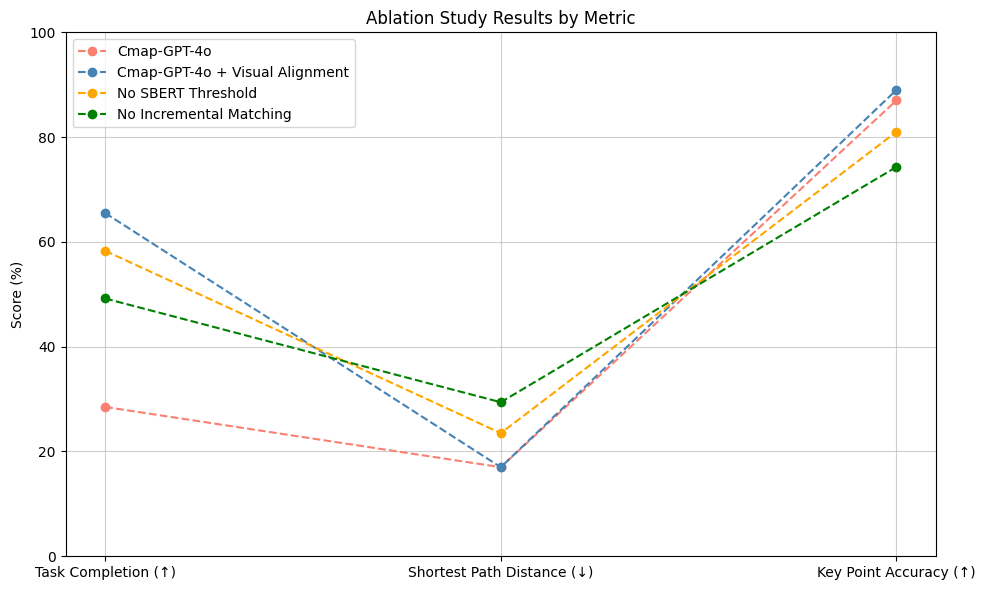

In [ ]:
import matplotlib.pyplot as plt

# Metrics as X-axis labels
metrics = ["Task Completion (↑)", "Shortest Path Distance (↓)", "Key Point Accuracy (↑)"]

# Model results across metrics
cmap_gpt4o = [28.5, 17.0, 87.0]
cmap_gpt4o_vis = [65.5, 17.0, 89.0]
no_sbert_thresh = [58.3, 23.5, 81.0]
no_inc_match = [49.2, 29.4, 74.3]

# X-axis positions
x = range(len(metrics))

# Create the plot
plt.figure(figsize=(10, 6))

plt.plot(x, cmap_gpt4o, marker='o', linestyle='--', label='Cmap-GPT-4o', color='salmon')
plt.plot(x, cmap_gpt4o_vis, marker='o', linestyle='--', label='Cmap-GPT-4o + Visual Alignment', color='steelblue')
plt.plot(x, no_sbert_thresh, marker='o', linestyle='--', label='No SBERT Threshold', color='orange')
plt.plot(x, no_inc_match, marker='o', linestyle='--', label='No Incremental Matching', color='green')

# Formatting
plt.xticks(x, metrics)
plt.ylabel("Score (%)")
plt.title("Ablation Study Results by Metric")
plt.ylim(0, 100)
plt.grid(True, linestyle='-', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
